#Applying KNN Classification on Fruits Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fruit_data_with_colors.txt to fruit_data_with_colors (1).txt


In [ ]:
df = pd.read_table("fruit_data_with_colors.txt")
print(df.head())

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


#Creating a dictionary where keys="1,2,...,n" and values = "Unique Names of fruit in dataset"

In [ ]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
fruit_names = dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))
fruit_names

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
df.shape

(59, 7)

#Training And Testing Model

<ipython-input-16-c6b444be2fc7>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap()


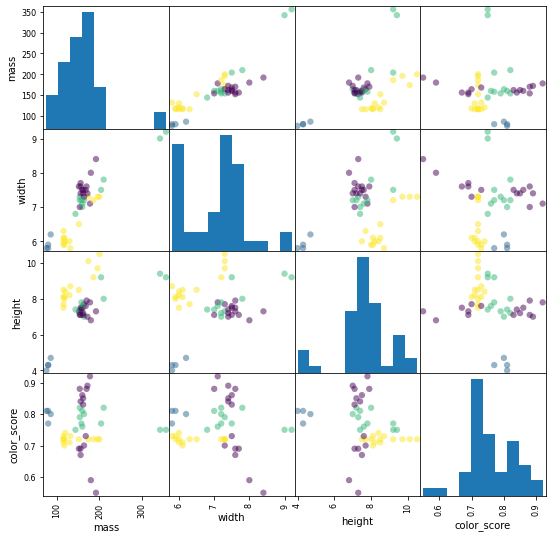

In [ ]:
# Split the data into training and testing
from pandas.plotting import scatter_matrix
x = df[['mass','width','height','color_score']]
y = df['fruit_label']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
# plotting a scatter matrix
cmap = plt.cm.get_cmap()
scatter = scatter_matrix(x_train, c = y_train, marker = 'o', figsize=(9,9), cmap = cmap,s=40) #s = size of scatter points, c = color of scatter points

#Making 3D Scatter Plot

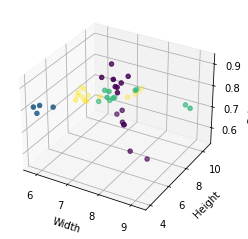

In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x_train['width'],x_train['height'],x_train['color_score'],c =y_train, marker = 'o')  # c indicates the color of data
ax.set_xlabel("Width")
ax.set_ylabel("Height")
ax.set_zlabel("Color_Score")
plt.show()

#Taking 3-Features and Training the model

In [ ]:
x = df[['mass', 'width', 'height']]       #taking 3 features
y = df['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

#Performing KNN Classification

In [ ]:
# Create classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

# Train the classifier using the training data
knn.fit(x_train,y_train)

KNeighborsClassifier()

#Testing the Accuracy

In [ ]:
# Estimate the accuracy of the classifier on future data, using the test data
knn.score(x_test,y_test)

0.5333333333333333

#Predicting the Fruit Name

In [ ]:
# Use the trained k-NN classifier model to classify new, previously unseen objects
# first example: a small fruit with mass 180g, width 7.3 cm, height 6 cm
fruit_prediction = knn.predict([[180, 7.3, 6]])
fruit_names[fruit_prediction[0]]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'apple'

In [ ]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
fruit_names[fruit_prediction[0]]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

#Checking the change in accuracy as per change in 'k' parameters

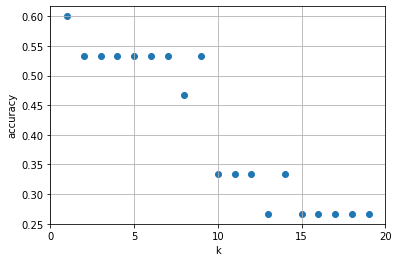

In [ ]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.grid()